# KNN model

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

### Prepare data

In [15]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

### Create test train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Create model

In [16]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [19]:
knn_model.predict(X_test)

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

### Analyze differences between validated model and hard coded defined model.

In [35]:
from sklearn.model_selection import cross_val_score

In [45]:
RMSE = []
RMSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1 * cross_val_score(knn_model, X_train, y_train, scoring='neg_mean_squared_error').mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k: ", k,  'RMSE: ', rmse, ', RMSE_CV: ', rmse_cv)

k:  1 RMSE:  0.0 , RMSE_CV:  346.07307722447337
k:  2 RMSE:  179.52761335480352 , RMSE_CV:  308.98084737929224
k:  3 RMSE:  205.20157172291863 , RMSE_CV:  286.51051892002596
k:  4 RMSE:  220.5139794876305 , RMSE_CV:  286.2869859874586
k:  5 RMSE:  239.64671325413764 , RMSE_CV:  289.6292034852988
k:  6 RMSE:  243.5904190007242 , RMSE_CV:  300.1901906442359
k:  7 RMSE:  258.1478781634636 , RMSE_CV:  301.7311367411422
k:  8 RMSE:  266.05374203349805 , RMSE_CV:  304.2703477242073
k:  9 RMSE:  269.73782093553376 , RMSE_CV:  301.2484957122238
k:  10 RMSE:  271.2798300436963 , RMSE_CV:  303.7765504213008


### Model tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
knn_params = {
    'n_neighbors': np.arange(1, 30, 1)
}

In [24]:
knn_params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [25]:
knn = KNeighborsRegressor()

In [26]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [29]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [46]:
knn_model_tuned = KNeighborsRegressor(knn_cv_model.best_params_.get('n_neighbors'))

In [49]:
knn_model_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [50]:
y_predictions = knn_model_tuned.predict(X_test)

In [52]:
knn_error = np.sqrt(mean_squared_error(y_test, y_predictions))

In [53]:
knn_error

413.7094731463598

# SVR model

In [90]:
from sklearn.svm import SVR

### Prepare data

In [102]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

### Create test, train data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
X_train = pd.DataFrame(X_train.Hits)
X_test = pd.DataFrame(X_test.Hits)

In [227]:
svr_model = SVR(kernel='linear')

In [228]:
svr_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [229]:
y_pred = svr_model.predict(X_test)

In [230]:
y_pred[0:10]

array([627.15609756, 681.82073171, 627.15609756, 428.37560976,
       155.05243902, 294.19878049, 781.21097561, 691.7597561 ,
       741.45487805, 299.16829268])

In [231]:
svr_error = np.sqrt(mean_squared_error(y_test, y_pred))
svr_error

459.0187960365147

In [232]:
interception = svr_model.intercept_[0]
coefficient = svr_model.coef_[0][0]
print('y = {0} + {1} * x'.format(interception, coefficient))

y = -48.69756097561513 + 4.969512195122093 * x


### Simply validate result for first prediction

In [233]:
first_obs = X_train['Hits'][0:1].values[0]
result_from_equation = interception + coefficient * first_obs
result_from_equation

403.5280487804953

In [234]:
y_pred[0]

627.1560975609794

In [235]:
import matplotlib.pyplot as plt

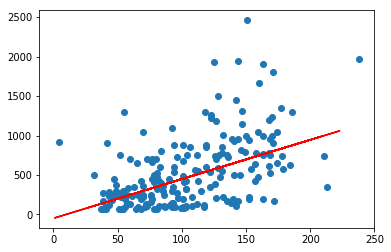

In [236]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red');

### Get predictions from LinearRegression model

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
linear_model = LinearRegression().fit(X_train, y_train)

In [239]:
lm_pred = linear_model.predict(X_test)

In [240]:
lm_pred[0:10]

array([694.63993894, 751.53695643, 694.63993894, 487.74169352,
       203.25660607, 348.08537787, 854.98607914, 761.8818687 ,
       813.60643006, 353.257834  ])

In [241]:
lm_interception = linear_model.intercept_
lm_coef = linear_model.coef_[0]
print('y = {0} + {1} * x'.format(lm_interception, lm_coef))

y = -8.814095480334572 + 5.1724561354706875 * x


### Reason of the difference betweeen SVR model and LinearRegression model is that SVR is not getting affected by outliers much

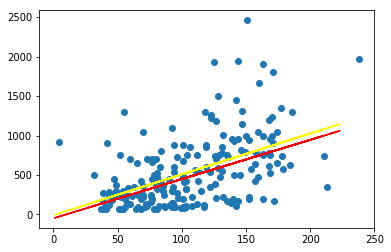

In [242]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red');
plt.plot(X_test, lm_pred, color = 'yellow')

### Model tuning

In [243]:
svr_params = {
    'C': np.arange(0.1, 2, 0.1)
}

### GridSearchCV instance can be used as SVR model

In [244]:
svr_model_cv = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [245]:
svr_model_cv.predict(X_test)[0:10]

array([620.26418033, 674.06202459, 620.26418033, 424.63565574,
       155.64643443, 292.58640164, 771.87628689, 683.84345082,
       732.75058197, 297.47711475])

In [246]:
svr_model_cv.best_params_

{'C': 0.1}

In [257]:
svr_model_tuned = SVR('linear', C=svr_model_cv.best_params_['C']).fit(X_train, y_train)

In [258]:
y_tuned_pred = svr_model_tuned.predict(X_test)

In [261]:
svr_tuned_error = np.sqrt(mean_squared_error(y_test, y_tuned_pred))
svr_tuned_error

458.198966781116

### Create model with all variables

In [262]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [268]:
svr_model1 = SVR('linear')
svr_params = {
    'C': np.arange(0.1, 2, 0.1)
}

In [271]:
svr_model_cv = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [272]:
svr_model_cv.best_params_

{'C': 0.4}

In [273]:
svr_model_tuned1 = SVR('linear', C = svr_model_cv.best_params_['C']).fit(X_train, y_train)

In [274]:
y_pred = svr_model_tuned1.predict(X_test)

In [275]:
svr_error1 = np.sqrt(mean_squared_error(y_test, y_pred))

In [276]:
svr_error1

367.5385297249052

# Non-Linear SVR

### Compare LinearRegression and Non-Linear SVR

In [311]:
np.random.seed(3)

x_rand = np.random.uniform(2, 10, 145)
y_rand = np.sin(x_rand) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5 * np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_rand, x_outliers]))
x_sim = np.concatenate([x_rand, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_rand, y_outliers])[x_sim_idx]

In [333]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(np.sin(x_sim[:, np.newaxis]), y_sim)
lm_pred = lm.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR

svr_model = SVR('rbf').fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr_model.predict(x_sim[:, np.newaxis])

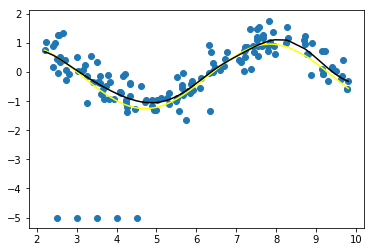

In [346]:
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.scatter(x_sim, y_sim)
plt_lm = plt.plot(x_sim, lm_pred, color='yellow')
plt_svr = plt.plot(x_sim, svr_pred, color='black')

### Create model

In [347]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [349]:
svr_model_rbf = SVR('rbf').fit(X_train, y_train)

In [350]:
y_pred = svr_model_rbf.predict(X_test)

In [352]:
svr_model_rbf_error = np.sqrt(mean_squared_error(y_test, y_pred))
svr_model_rbf_error

473.4445984431814

### Model tuning

In [361]:
svr_params = {
    'C': np.arange(0.1, 100, 0.1)
}
svr_model_rbf_cv = GridSearchCV(svr_model_rbf, svr_params, cv=10)
svr_model_rbf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,...
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             pre

In [363]:
svr_model_rbf_cv.best_params_

{'C': 19.800000000000004}

In [369]:
svr_model_rbf_tuned = SVR('rbf', C=svr_model_rbf_cv.best_params_['C']).fit(X_train, y_train)

In [370]:
y_pred = svr_model_rbf_tuned.predict(X_test)

In [371]:
svr_model_rbf_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
svr_model_rbf_tuned_error

472.2131619800523

# Artificial Neural Networks (ANN)

### Create model

In [488]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [489]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [490]:
from sklearn.neural_network import MLPRegressor

In [491]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [492]:
y_pred = mlp_model.predict(X_test_scaled)

In [493]:
mlp_model_error = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_model_error

657.1328222587128